In [53]:
# Use seaborn for pairplot.
!pip install --upgrade pip
!pip install -q seaborn
!pip install --upgrade xlrd
!pip install --upgrade tensorflow

    100% |████████████████████████████████| 1.5MB 5.7MB/s ta 0:00:011
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
     |████████████████████████████████| 103 kB 718 kB/s eta 0:00:01
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no long

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [62]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.10.0


## COMPOSITS DATASET




In [56]:
column_names = ['Угол нашивки, град',	'Шаг нашивки',	'Плотность нашивки',	'Соотношение матрица-наполнитель',	'Плотность, кг/м3	модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Температура вспышки, С_2',	'Поверхностная плотность, г/м2',	'Модуль упругости при растяжении, ГПа',	'Прочность при растяжении, МПа',	'Потребление смолы, г/м2']

raw_dataset = pd.read_excel('../data/join.xls', index_col=0)

In [57]:
dataset = raw_dataset.copy()
dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
1018,90,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,90,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,90,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,90,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,90,6.078902,77.434468,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


### Clean the data

The dataset contains a few unknown values:

In [58]:
dataset.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [59]:
dataset = dataset.dropna()
dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
1018,90,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,90,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,90,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,90,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,90,6.078902,77.434468,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


In [60]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
464,0,4.447498,103.988901,2.440166,1980.132394,357.938256,130.541848,21.177094,290.618547,119.756192,68.900703,1577.288189,129.038238
25,90,5.000000,57.000000,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
110,0,3.708515,78.380006,3.490162,1986.340110,1257.779003,93.748554,24.593272,338.101359,76.682693,76.179383,2605.949634,261.819468
149,0,4.036464,60.329680,1.916843,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039
152,0,7.557387,58.732672,1.493196,1997.212555,1010.784737,107.549456,17.300539,322.532498,165.345449,72.775930,2144.891733,160.115495


In [38]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",818.0,43.899756,45.014071,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,818.0,6.879073,2.611603,0.037639,5.000000,6.943337,8.579164,14.440522
Плотность нашивки,818.0,57.288675,12.290801,11.740126,50.036793,57.328584,65.146638,103.988901
Соотношение матрица-наполнитель,818.0,2.943975,0.922190,0.389403,2.320191,2.919678,3.583641,5.591742
"Плотность, кг/м3",818.0,1974.377546,74.987638,1731.764635,1922.343882,1975.555671,2021.186675,2207.773481
"модуль упругости, ГПа",818.0,741.514342,329.799496,2.436909,502.628230,742.886633,966.871905,1911.536477
"Количество отвердителя, м.%",818.0,111.192968,27.797189,29.956150,93.306043,111.507330,129.689233,198.953207
"Содержание эпоксидных групп,%_2",818.0,22.249671,2.395012,14.254985,20.607747,22.267857,23.952628,33.000000
"Температура вспышки, С_2",818.0,286.243917,41.283747,100.000000,260.274330,286.220763,313.518533,403.652861
"Поверхностная плотность, г/м2",818.0,490.129423,280.043448,1.894093,273.012973,463.881777,697.683605,1399.542362


In [39]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('модуль упругости, ГПа')
test_labels = test_features.pop('модуль упругости, ГПа')

## Normalization


In [40]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
"Угол нашивки, град",43.899756,45.014071
Шаг нашивки,6.879073,2.611603
Плотность нашивки,57.288675,12.290801
Соотношение матрица-наполнитель,2.943975,0.922190
"Плотность, кг/м3",1974.377546,74.987638
"модуль упругости, ГПа",741.514342,329.799496
"Количество отвердителя, м.%",111.192968,27.797189
"Содержание эпоксидных групп,%_2",22.249671,2.395012
"Температура вспышки, С_2",286.243917,41.283747
"Поверхностная плотность, г/м2",490.129423,280.043448


### The Normalization layer


In [63]:
normalizer = tf.keras.layers.Normalization(axis=-1)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Normalization'

In [101]:
normalizer.adapt(np.array(train_features))

In [102]:
print(normalizer.mean.numpy())

[[  43.9      6.879   57.289    2.944 1974.377  111.193   22.25   286.244
   490.129   73.369 2467.736  217.258]]


In [103]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  90.      7.01   66.17    1.42 1977.62  135.71   18.52  318.44  171.68
    72.97 2220.73  131.88]]

Normalized: [[ 1.02  0.05  0.72 -1.65  0.04  0.88 -1.56  0.78 -1.14 -0.13 -0.52 -1.44]]


## Linear regression


### Linear regression с одной переменной

In [104]:
filler_matrix = np.array(train_features['Соотношение матрица-наполнитель'])

filler_matrix_normalizer = layers.Normalization(input_shape=[1,], axis=None)
filler_matrix_normalizer.adapt(filler_matrix)

In [105]:
filler_matrix_model = tf.keras.Sequential([
    filler_matrix_normalizer,
    layers.Dense(units=1)
])

filler_matrix_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `'модуль упругости, ГПа'` from `'Соотношение матрица-наполнитель'`.


In [106]:
filler_matrix_model.predict(filler_matrix[:10])

array([[-1.914],
       [ 0.455],
       [ 0.027],
       [ 1.71 ],
       [ 0.458],
       [-1.369],
       [-1.105],
       [-1.838],
       [-0.032],
       [ 0.009]], dtype=float32)

In [107]:
filler_matrix_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [108]:
%%time
history = filler_matrix_model.fit(
    train_features['Соотношение матрица-наполнитель'],
    train_labels,
    epochs=100,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.28 s, sys: 356 ms, total: 6.64 s
Wall time: 6.29 s


In [109]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,562.181091,539.024414,95
96,560.389160,537.158142,96
97,558.664001,535.260864,97
98,556.903015,533.407776,98
99,555.140808,531.547852,99


In [110]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [модуль упругости, ГПа]')
  plt.legend()
  plt.grid(True)

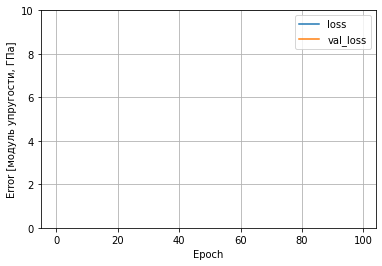

In [27]:
plot_loss(history)

In [111]:
test_results = {}

test_results['filler_matrix_model'] = filler_matrix_model.evaluate(
    test_features['Соотношение матрица-наполнитель'],
    test_labels, verbose=0)

In [112]:
x = tf.linspace(0.0, 250, 251)
y = filler_matrix_model.predict(x)

In [113]:
def plot_filler_matrix(x, y):
  plt.scatter(train_features['Соотношение матрица-наполнитель'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Соотношение матрица-наполнитель')
  plt.ylabel('модуль упругости, ГПа')
  plt.legend()

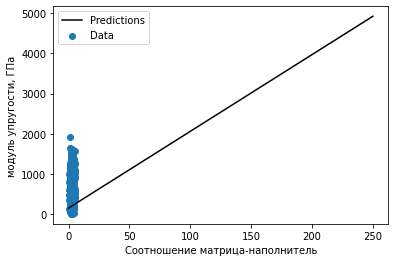

In [114]:
plot_filler_matrix(x, y)

### Linear regression с несколькими входами

In [115]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [116]:
linear_model.predict(train_features[:10])

array([[ 1.941],
       [ 0.237],
       [ 1.441],
       [-1.71 ],
       [-0.865],
       [-0.439],
       [ 1.772],
       [-0.579],
       [-0.521],
       [-1.923]], dtype=float32)

In [117]:
linear_model.layers[1].kernel

<tf.Variable 'dense_13/kernel:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.336],
       [ 0.427],
       [-0.565],
       [-0.359],
       [-0.138],
       [ 0.296],
       [-0.606],
       [ 0.52 ],
       [-0.258],
       [-0.347],
       [-0.066],
       [-0.069]], dtype=float32)>

In [118]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [119]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.24 s, sys: 297 ms, total: 6.54 s
Wall time: 10.6 s


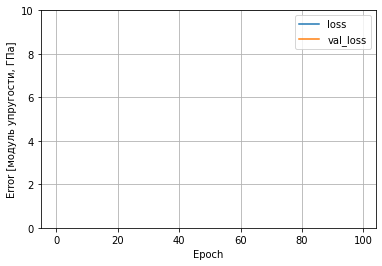

In [120]:
plot_loss(history)

In [121]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [122]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [123]:
dnn_filler_matrix_model = build_and_compile_model(filler_matrix_normalizer)

In [124]:
dnn_filler_matrix_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                128       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [125]:
%%time
history = dnn_filler_matrix_model.fit(
    train_features['Соотношение матрица-наполнитель'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.08 s, sys: 477 ms, total: 8.55 s
Wall time: 7.92 s


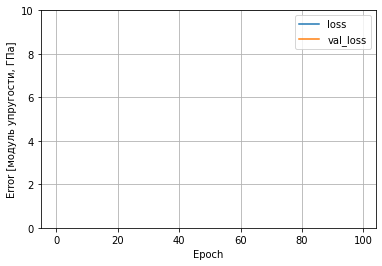

In [126]:
plot_loss(history)

In [127]:
x = tf.linspace(0.0, 250, 251)
y = dnn_filler_matrix_model.predict(x)

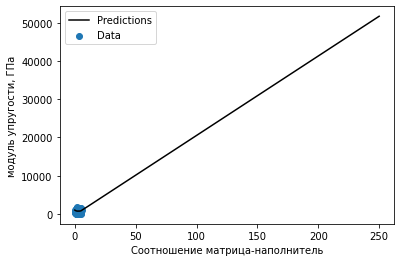

In [128]:
plot_filler_matrix(x, y)

In [129]:
test_results['dnn_filler_matrix_model'] = dnn_filler_matrix_model.evaluate(
    test_features['Соотношение матрица-наполнитель'], test_labels,
    verbose=0)

In [130]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                832       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [131]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.29 s, sys: 548 ms, total: 8.83 s
Wall time: 7.9 s


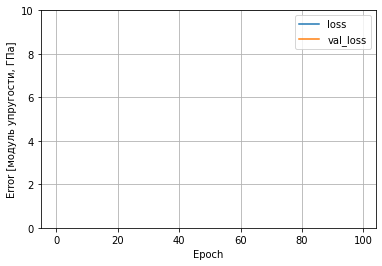

In [132]:
plot_loss(history)

In [133]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [134]:
pd.DataFrame(test_results, index=['Mean absolute error [модуль упругости, ГПа]']).T

,"Mean absolute error [модуль упругости, ГПа]"
filler_matrix_model,536.899353
linear_model,541.644348
dnn_filler_matrix_model,263.714874
dnn_model,278.894867


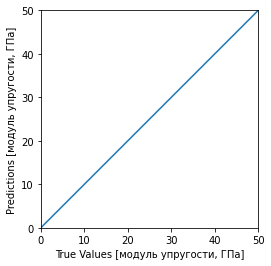

In [135]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [модуль упругости, ГПа]')
plt.ylabel('Predictions [модуль упругости, ГПа]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


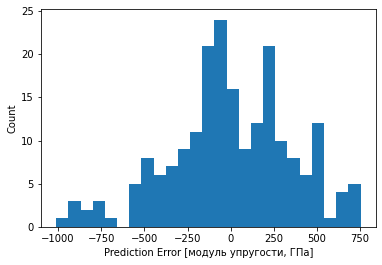

In [136]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [модуль упругости, ГПа]')
_ = plt.ylabel('Count')

In [137]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [138]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [89]:
pd.DataFrame(test_results, index=['Mean absolute error [модуль упругости, ГПа]']).T

,"Mean absolute error [модуль упругости, ГПа]"
filler_matrix_model,379.633575
